<a href="https://colab.research.google.com/github/mansukim1125/Deep-Learning-from-Scratch/blob/main/neural_network_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시작하기 전, 학습에 필요한 데이터 셋이나 예제 코드를 Github에서 clone해야 한다.

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 22.72 MiB/s, done.
Resolving deltas: 100% (477/477), done.


# 학습이란?
* 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 말함

# 데이터
## 훈련 데이터, 시험 데이터
1. 기계 학습 문제는 데이터를 훈련 데이터와 시험 데이터로 나누고, (범용 능력을 평가하기 위해)
2. 훈련 데이터만 사용해 학습하면서 최적의 매개변수를 찾는다.
3. 시험 데이터를 사용해 앞서 훈련한 모델의 실력을 평가.
따라서 여러 데이터 셋을 이용해 매개변수의 학습과 평가를 수행해야 한다. 그렇지 않고 하나의 데이터 셋을 이용하면 해당 데이터 셋에 *편향된* **오버피팅(overfitting. 과적합) 상태**가 될 수 있다.



# 손실 함수
* 신경망이 학습할 수 있도록 해주는 지표. 이 손실 함수의 값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 '학습'의 목표

신경망 학습에서는 현재의 상태를 '*하나의 지표*'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것을 학습이라 한다. 신경망 학습에서 사용하는 *지표*를 **손실 함수**라 한다.



## 평균 제곱 오차
가장 많이 쓰이는 손실 함수로, 다음의 식으로 표현된다:

$E= \frac{1}{2}\sum_{k}^{}(y_{k}-t_{k})^{2}$
&nbsp;($y_{k}$는 신경망의 출력, $t_{k}$는 정답 레이블, $k$는 데이터의 차원 수)

다음의 예를 보자:

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # one-hot encoding

위 배열 중 y은 MNIST의 손글씨 인식 예제의 출력이고, t는 정답 레이블이다. 여기서 정답은 t[2]가 1 이므로 2 이다. 그렇다면 평균 제곱 오차를 코드로 구현해 보자.

In [ ]:
import numpy as np


def mean_squared_error(y, t):
  return 0.5 * np.sum((y - t) ** 2)

그리고 이 함수에 위 y, t를 인자로 전달하고 실행해보자. 다음은 첫 번째 예이다.

In [ ]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

이는 위 y,t 를 그대로 사용했다. 두 번째 예는 오차가 크게 나오도록 y(출력)중 정답에 해당하는 y[2]를 0.1로, y[7]을 0.6로 조정해 보았다.

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mean_squared_error(np.array(y), np.array(t))

0.5975

두 번째 결과를 보면 추정이 실패할 경우 정답과 오차가 크게 발생함을 알 수 있다. 또한 오차가 적은 첫 번째 추정 결과가 정답에 더 가깝다고 할 수 있다. 

## 교차 엔트로피 오차
다음의 식으로 표현된다:

$E= -\sum_{k}^{}t_{k}\log_{e}y_{k}$&nbsp;($y_{k}$는 신경망의 출력, $t_{k}$는 정답 레이블, $k$는 데이터의 차원 수)

실질적으로 $y_{k}$중 $t_{k}$가 1인 원소에 해당하는 값만 $log_{e}y_{k}$를 구한다고 할 수 있다. (질문: 왜 sigma를 사용했는가?)

다음은 $log_{e}x$의 그래프이다:

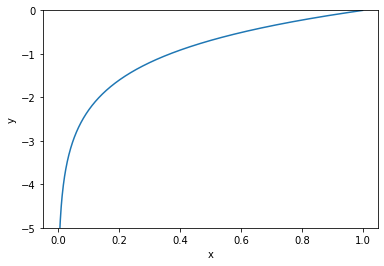

In [ ]:
import matplotlib.pyplot as plt


x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)

plt.ylim(-5, 0)

plt.show()

먼저 교차 엔트로피 오차를 코드로 구현해 보자:

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7 # np.log(0)인 경우, -inf가 되어 계산할 수 없기 때문.
  return -np.sum(t * np.log(y + delta))

첫 번째 예는 정답이 2인 예이다.

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # one-hot encoding

In [ ]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

두 번째 예는 위 평균 제곱 오차와 같은 예로, 오차가 크게 나오게끔 출력을 조정했다.

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

위 예를 보면 정답일 때의 출력이 0.6으로, 교차 엔트로피 오차는 0.51이고, 두 번째 예를 보면 정답일 때의 출력이 0.1으로, 교차 엔트로피 오차는 2.30이다. 따라서 오차가 더 작은 추정(첫 번째 예)이 더 정답에 가깝다고 할 수 있다.

## 미니배치 학습
기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개 변수를 찾아내는 것이다. 이렇게 하려면 먼저 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다. 즉 훈련 데이터가 100개 있으면 100개의 손실 함수의 값을 계산해 이의 합을 *지표*로 삼는 것이다.

교차 엔트로피 오차의 식은 다음과 같이 변형된다:

$E= -\frac{1}{N}\sum_{n}\sum_{k}^{}t_{nk}\log_{e}y_{nk}$&nbsp;($y_{nk}$는 신경망의 출력, $t_{nk}$는 정답 레이블, $k$는 데이터의 차원 수) (질문. 평균($\frac{1}{N}\sum_{n}$)을 내는 이유?)

이 식은 위 교차 엔트로피 오차의 식을 $n$개의 데이터로 확장했을 뿐이다. 또한 마지막에 $N$으로 나누어 줌으로써 ***평균 손실 함수***를 구하는 것이다.

그러나 여기서 모든 데이터에 대해 손실 함수의 합을 구하려면 시간이 오래 걸릴 것이다. 따라서 일부 데이터만 추출해서 전체의 *근사치*로 이용할 수 있다.

그렇다면 MNIST 데이터 셋을 이용해 미니배치 학습을 한 번 구현해 보자. 먼저 Git Repo 디렉토리로 들어가 보자.

In [ ]:
%cd deep-learning-from-scratch

/content/deep-learning-from-scratch


다음은 MNIST 데이터 셋을 불러오는 코드이다:

In [ ]:
from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


x_train은 훈련 데이터로, 60000개의 이미지 데이터, 각 데이터 당 784(28 * 28)픽셀로 구성되어 있다. 또 t_train은 정답 레이블로, 60000개의 이미지 데이터에 대한 숫자 레이블이다. 이 훈련 데이터에서 무작위로 10장만 추출해 보자.

In [ ]:
train_size = x_train.shape[0] # 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

print(batch_mask)

x_batch = x_train[batch_mask] # 10 개의 훈련 데이터
t_batch = t_train[batch_mask] # 10 개의 정답 레이블

[ 8072 28479 45588 21539 51777 50428  5561 38244  2713 31972]


그렇다면, 위의 데이터의 교차 엔트로피 값을 구하기 위한 손실 함수를 코드로 구현해 보자:

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y)) / batch_size

# 수치 미분
경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 결정한다.

## 미분
미분(영어: derivative, 微分)은 어떤 함수의 정의역 속 각 점에서 함숫값의 변화량과 독립 변숫값의 변화량 비의 극한이다. 이는 다음의 식으로 표현될 수 있다:

$\frac{df(x)}{dx}=\lim_{h \to 0}\frac{f(x+h)-f(x)}{h}$

이를 코드로 구현해 보자:

In [ ]:
def numerical_diff(f, x):
  h = 1e-50 # 아주 작은 값
  return (f(x + h) - f(x)) / h

위 코드는 $h$값으로 아주 작은 $10^{-50}$를 사용했다. 하지만 이를 실제 계산에 적용하면 다음과 같은 문제가 발생할 수 있다.

In [ ]:
np.float32(1e-50)

0.0

이와 같이 너무 작은 값을 이용해 계산하면 컴퓨터로 계산하는 데 문제가 발생할 수 있다. 그렇다면 그 정도로 작은 값은 아니지만 어느 정도로 작은 값인 $10^{-4}$를 $h$로 이용해 보자. 하지만 이렇게 하면 $f(x + h) - f(x)$간 차이가 커질 수밖에 없고 실제 기울기와 차이가 생길 수밖에 없다.

따라서 이 오차를 줄이기 위해 $x + h$와 $x - h$일 때의 값의 중앙을 찾는 방법을 사용한다. 그렇다면 이러한 개선점들을 적용해 다시 코드를 작성해보자:

In [ ]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2 * h)

위 코드는 다음의 식을 구현한 것이다:

$\frac{df(x)}{dx}=\lim_{h \to 0}\frac{1}{2}\frac{f(x+h)-f(x-h)}{h}$

## 편미분
다음의 함수를 보자:

$f(x_{0}, x_{1})=x_{0}^{2}+x_{1}^{2}$

이 함수에는 일반적인 함수와 다르게 매개변수가 2개이다. ($x_{1}, x_{2}$)

이 함수를 코드로 구현해 보자:

In [ ]:
f = lambda x: x[0] ** 2 + x[1] ** 2 # x는 numpy array

그렇다면 위 함수를 미분해보자. 그렇다면 먼저 생각해야 할 것은 어느 변수에 대한 미분인가이다. 이와 같이 변수가 여럿인 함수에 대한 미분을 *편미분*이라 한다. 위 함수의 편미분을 수식으로는 $\frac{\partial f}{\partial x_{0}}, \frac{\partial f}{\partial x_{1}}$로 쓴다. 다음은 해당 함수의 편미분의 예이다:

문제 1: $x_{0} = 3$, $x_{1} = 4$일 때, $x_{0}$에 대한 편미분 $\frac{\partial f}{\partial x_{0}}$를 구하라.

In [ ]:
def f_x0(x0):
  return x0 * x0 + 4.0 ** 2.0 # x1이 4이므로 미리 설정

numerical_diff(f_x0, 3.0) # x0 에 대한 편미분

6.00000000000378

문제 2: $x_{0} = 3$, $x_{1} = 4$일 때, $x_{1}$에 대한 편미분 $\frac{\partial f}{\partial x_{1}}$를 구하라.

In [ ]:
def f_x1(x1):
  return 3.0 ** 2 + x1 * x1

numerical_diff(f_x1, 4.0)

7.999999999999119

이처럼 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다. 단, 여러 변수 중 목표 변수 하나를 두고 다른 변수는 값을 고정해 그동안 사용했던 수치 미분 함수를 적용해 편미분을 구한 것이다.

# 기울기
앞에서는 $x_{0}$와 $x_{1}$의 편미분을 따로 계산했다. 하지만 이 둘의 편미분을 *동시에* 계산하고자 한다. 예를 들어 $x_{0} = 3$, $x_{1} = 4$일 때 이 둘의 편미분을 묶어 $(\frac{\partial f}{\partial x_{0}}, \frac{\partial f}{\partial x_{1}})$을 계산한다고 해보자. 이렇게 모든 변수의 편미분을 벡터로 정리한 것을 ***기울기***라고 한다. 다음의 코드는 기울기를 계산하는 코드이다:

In [ ]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 같은 shape의 기울기 벡터

  for idx in range(x.size):
    # x는 numpy array이므로 특정 값(x[idx])을 temp로 가지고 있다가
    # f(x)계산이 완료되면 다시 복원하는 것이 깔끔
    temp = x[idx]
    
    x[idx] = temp + h # x + h
    fx_plus_h = f(x)

    x[idx] = temp - h # x - h
    fx_minus_h = f(x)

    grad[idx] = (fx_plus_h - fx_minus_h) / (2 * h) # 중심 차분
    x[idx] = temp

  return grad

그렇다면 이 코드를 이용해 실제로 기울기를 구해 보자:

In [ ]:
numerical_gradient(f, np.array([3.0, 4.0]))

array([6., 8.])

위에 계산한 결과와 거의 일치함을 알 수 있다. 또한 손실 함수의 값이 가장 작은 지점에서의 가중치 매개변수를 찾는 것이 바로 다음에 언급할 경사법의 목표라 할 수 있다. 그때 사용할 수 있는 지표가 바로 기울기이다. 하지만 기울기가 0이라고 그 값이 반드시 해당 함수의 최솟값이라고 할 수는 없다.

## 경사 하강법
위에서 설명했듯, 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 최소한 그 방향으로 가야 함수의 값을 줄일 수 있다. 그래서 경사 하강법은 기울기를 이용해 나아갈 방향을 정해야 한다. 경사법은 기계 학습을 ***최적화***하는 데 흔히 쓰는 방법이다. 아래는 경사법을 수식으로 표현한 것이다:

$x_{0}=x_{0}-\eta \frac{\partial f}{\partial x_{0}}$

$x_{1}=x_{1}-\eta \frac{\partial f}{\partial x_{1}}$

($\eta$는 학습률)

$\eta$는 신경망 학습에서는 학습률로, 한 번의 학습으로 매개변수 값을 얼마나 갱신하는지를 정하는 인자이다. 위 식은 1회에 해당하는 갱신이고, 이를 반복해 서서히 함수의 값을 줄이는 것이다. 이 값은 미리 특정 값으로 정해두어야 하는데, 일반적으로 이 값이 너무 크거나 작으면 *좋은 장소*를 찾기 어렵다. 다음은 경사 하강법을 코드로 구현한 것이다.

In [ ]:
def gradient_descent(f, x, lr=0.01, step_num=100, verbose=False):
  x_history = []
  x_history.append(x)
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
    print(x)
    x_history.append(x)

  if verbose is True: return (x, x_history, )
  return x

f는 최적화하려는 함수, x는 초깃값, lr은 learning rate, step_num은 경사법에 따른 반복 횟수이다. 함수의 기울기는 numerical_gradient로 구하고, 이를 stem_num만큼 반복해 x를 갱신한다. 다음은 경사 하강법의 예이다:

문제: 경사법으로 $f(x_{0}, x_{1})=x_{0}^{2}+x_{1}^{2}$의 최솟값을 구하라.

In [ ]:
x = np.array([-3.0, 4.0])
gradient_descent(f, x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

아래는 이 과정을 표현한 그래프이다:

In [ ]:
x = np.array([-3.0, 4.0])
x, x_history = gradient_descent(f, x, lr=0.1, step_num=100, verbose=True)

print(x, x_history)

# plt.plot

[-2.4  3.2]
[-1.92  2.56]
[-1.536  2.048]
[-1.2288  1.6384]
[-0.98304  1.31072]
[-0.786432  1.048576]
[-0.6291456  0.8388608]
[-0.50331648  0.67108864]
[-0.40265318  0.53687091]
[-0.32212255  0.42949673]
[-0.25769804  0.34359738]
[-0.20615843  0.27487791]
[-0.16492674  0.21990233]
[-0.1319414   0.17592186]
[-0.10555312  0.14073749]
[-0.08444249  0.11258999]
[-0.06755399  0.09007199]
[-0.0540432   0.07205759]
[-0.04323456  0.05764608]
[-0.03458765  0.04611686]
[-0.02767012  0.03689349]
[-0.02213609  0.02951479]
[-0.01770887  0.02361183]
[-0.0141671   0.01888947]
[-0.01133368  0.01511157]
[-0.00906694  0.01208926]
[-0.00725355  0.00967141]
[-0.00580284  0.00773713]
[-0.00464228  0.0061897 ]
[-0.00371382  0.00495176]
[-0.00297106  0.00396141]
[-0.00237684  0.00316913]
[-0.00190148  0.0025353 ]
[-0.00152118  0.00202824]
[-0.00121694  0.00162259]
[-0.00097356  0.00129807]
[-0.00077884  0.00103846]
[-0.00062308  0.00083077]
[-0.00049846  0.00066461]
[-0.00039877  0.00053169]
[-0.00031901  0.

이 예는 초깃값을 $(-3.0, 4.0)$으로 설정하고 경사법을 이용해 최솟값 탐색을 수행한다. 최종 결과는 $(-6.11110793e-10, 8.14814391e-10)$으로 거의 $(0, 0)$에 수렴한다.

(학습률이 너무 크거나 작은 경우 실험)

## 신경망에서의 기울기
신경망의 학습에서는 가중치 매개변수에 대한 손실 함수의 기울기를 구해야 한다. 예를 들어 가중치가 $W$, 손실 함수가 $L$인 신경망을 생각해 보자:

$W=\begin{pmatrix}
w_{11} & w_{21} & w_{31}\\ 
w_{12} & w_{22} & w_{32}
\end{pmatrix}$

$\frac{\partial L}{\partial W}=\begin{pmatrix}
\frac{\partial L}{\partial W_{11}} & \frac{\partial L}{\partial W_{21}} & \frac{\partial L}{\partial W_{31}}\\ 
\frac{\partial L}{\partial W_{12}} & \frac{\partial L}{\partial W_{22}} & \frac{\partial L}{\partial W_{32}}
\end{pmatrix}$

$\frac{\partial L}{\partial W}$의 각 원소는 각각의 원소에 대한 편미분이다. 예를 들어 $\frac{\partial L}{\partial W_{11}}$은 $w_{11}$을 조금 변경했을 때 $L$이 얼마나 변화하는지를 나타낸다. 여기서 중요한 것은 $W$와 $\frac{\partial L}{\partial W}$의 형상이 같다는 것이다. 그렇다면 간단한 신경망에서 실제로 기울기를 구해 보자:

In [ ]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2, 3)

  def predict(self, x):
    return np.dot(x, self.W)

  def loss(self, x, t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y, t)

    return loss